In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/00-marketing-campaign-data-processing/__results__.html
/kaggle/input/00-marketing-campaign-data-processing/__notebook__.ipynb
/kaggle/input/00-marketing-campaign-data-processing/__output__.json
/kaggle/input/00-marketing-campaign-data-processing/custom.css
/kaggle/input/00-marketing-campaign-data-processing/processed/hypothesis_ready.csv
/kaggle/input/00-marketing-campaign-data-processing/processed/processed.csv
/kaggle/input/00-marketing-campaign-data-processing/processed/processed.pkl
/kaggle/input/arketing-campaign/marketing_campaign.csv
/kaggle/input/arketing-campaign/marketing_campaign.xlsx


<h2>1. Set-up</h2>

In [2]:
IN_PATH = '/kaggle/input/00-marketing-campaign-data-processing/'
HYP_DATA = IN_PATH + 'processed/hypothesis_ready.csv'
df = pd.read_csv(HYP_DATA)
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpend,AcceptedCnt
0,5524,1957,68,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,1,1617,0
1,2174,1954,71,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,0,27,0
2,4141,1965,60,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,0,776,0
3,6182,1984,41,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,0,53,0
4,5324,1981,44,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,0,422,0


In [3]:
df['Response'] = (df['Response']>0).astype(int)

In [4]:
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalSpend,AcceptedCnt
0,5524,1957,68,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,1,1617,0
1,2174,1954,71,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,0,27,0
2,4141,1965,60,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,0,776,0
3,6182,1984,41,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,0,53,0
4,5324,1981,44,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,0,422,0


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Age', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalSpend', 'AcceptedCnt'],
      dtype='object')

In [6]:
# Covariate candidates
cov_pool = [
    "Age","Income","Kidhome","Teenhome","Education","Marital_Status","Recency",
    "NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
    "NumWebVisitsMonth","NumDealsPurchases","AcceptedCnt"
]
available_covs = [c for c in cov_pool if c in df.columns]

<h2>2. EDA: Compare Average Spend of Response - 1 vs. 0 </h2>

In [7]:
group_stats = df.groupby('Response')['TotalSpend'].agg(['mean', 'std', 'count']).rename(index={1:'Participants', 0:'Non-Participants'})
display(group_stats)

,mean,std,count
Response,,,
Non-Participants,538.238522,551.184378,1895
Participants,987.392216,719.009695,334


In [8]:
FIG_PATH = '/kaggle/working/figure'
os.makedirs(FIG_PATH, exist_ok=True)

In [ ]:
# df[df['Response']==0][['Response', 'TotalSpend']].head(15)

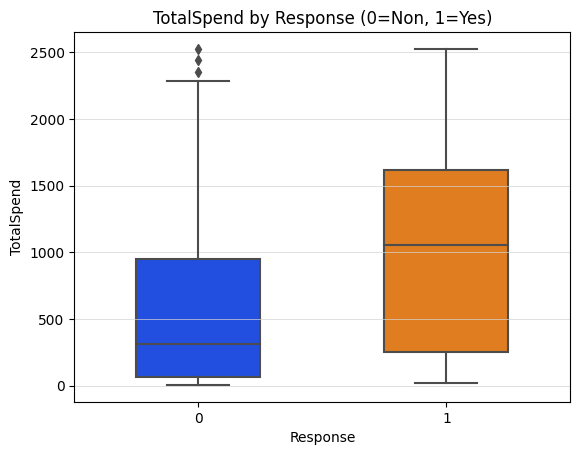

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df, x='Response', y='TotalSpend', order=[0, 1], palette='bright', width=0.5)

plt.title('TotalSpend by Response (0=Non, 1=Yes)')
plt.xlabel('Response')
plt.ylabel('TotalSpend')
plt.grid(axis='y', which='major', color='lightgray', linestyle='-', linewidth=0.5)
plt.savefig(FIG_PATH + '/box_plot_totalspend_response.png', dpi=200, bbox_inches='tight')
plt.show()

<h2>3. Welch's t-test</h2>

In [11]:
from typing import Dict, List, Optional

def two_mean_ttest(mean_a: float, var_a: float, n_a: int,
                   mean_b: float, var_b: float, n_b: int,
                   equal_var: bool = False,
                   alternative: str = "two-sided") -> Dict[str, float]:
    """
    Returns: {'t','df','p_value','diff','se','ci95'}
    """
    diff = mean_b - mean_a
    if equal_var:
        # equal_var=True -> Student's T-test
        sp2 = ((n_a - 1) * var_a + (n_b - 1) * var_b) / max(1, n_a + n_b - 2)
        se = math.sqrt(sp2 * (1 / max(1, n_a) + 1 / max(1, n_b)) + 1e-12)
        df = n_a + n_b - 2    # (df, degree of freedom)

    else:    # equal_var=False -> Welch's T-test
        se = math.sqrt(var_a / max(1, n_a) + var_b / max(1, n_b) + 1e-12)
        # Welch–Satterthwaite
        num = (var_a / max(1, n_a) + var_b / max(1, n_b)) ** 2
        den = (var_a ** 2) / (max(1, n_a ** 2 * (n_a - 1))) + (var_b ** 2) / (max(1, n_b ** 2 * (n_b - 1)))
        df = num / (den + 1e-12)

    t = diff / se
    _phi = lambda x: 0.5 * (1 + math.erf(x / math.sqrt(2)))
    
    if alternative == "two-sided":
        p = 2 * (1 - _phi(abs(t)))
    elif alternative == "larger":
        p = 1 - _phi(t)
    else:
        p = _phi(t)

    ci_low = diff - 1.96 * se
    ci_high = diff + 1.96 * se
    return {
        "t": float(t), "df": float(df), "p_value": float(p), "diff": float(diff),
        "se": float(se), "ci95": (float(ci_low), float(ci_high))
    }

In [12]:
import math
import json

def analyze_ab_from_dataframe(df: pd.DataFrame, group_col: str, outcome_col: str,
                              out_dir: Optional[str] = None) -> Dict[str, float]:

    groups = sorted(list(df[group_col].unique()))
    print(groups)
    assert len(groups) == 2
    a, b = groups[0], groups[1]

    # group outcome
    d_a = df[df[group_col] == a][outcome_col]
    d_b = df[df[group_col] == b][outcome_col]

    # Welch t-test
    res = two_mean_ttest(
        float(d_a.mean()), float(d_a.var(ddof=1)), int(d_a.shape[0]),
        float(d_b.mean()), float(d_b.var(ddof=1)), int(d_b.shape[0]),
        equal_var=False
    )

    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        with open(f"{out_dir}/report.json", "w", encoding="utf-8") as f:
            json.dump(res, f, ensure_ascii=False, indent=2)

    return res

In [15]:
ab_frequency = analyze_ab_from_dataframe(df, group_col='Response', outcome_col='TotalSpend', out_dir='outdata')
print(ab_frequency)

[0, 1]
{'t': 10.867564452850104, 'df': 404.7909449218651, 'p_value': 0.0, 'diff': 449.1536931414216, 'se': 41.32974734956622, 'ci95': (368.14738833627183, 530.1599979465714)}


In [17]:
df_freq = pd.DataFrame(ab_frequency)
df_freq.to_csv('outdata/ab_freqency.csv')

<h2>4. Model: Bayesian, Normal-Inverse Gamma</h2>

In [18]:
def posterior_normal_unknown_var(mu0: float, kappa0: float, alpha0: float, beta0: float,
                                 xbar: float, s2: float, n: int) -> Dict[str, float]:
    """
    σ^2 unknown: Normal–Inverse-Gamma
    """

    kappa_n = kappa0 + n    # kappa_n: prior(kappa0) + number of data(n)
    mu_n = (kappa0 * mu0 + n * xbar) / kappa_n    # mu_n: posterior average.

    alpha_n = alpha0 + n / 2
    beta_n = beta0 + 0.5 * (n * s2 + (kappa0 * n * (xbar - mu0) ** 2) / kappa_n)
    sigma2_n = beta_n / max(1e-9, (alpha_n - 1))

    return {"mean": float(mu_n), "var": float(sigma2_n / kappa_n)}

In [19]:
def prob_diff_greater(mu_a: float, var_a: float,
                      mu_b: float, var_b: float,
                      delta: float = 0.0) -> float:
    """
    Δ = μ_B - μ_A ~ Normal(μ_b-μ_a, var_a + var_b)
    """
    mean = mu_b - mu_a
    sd = math.sqrt(var_a + var_b + 1e-12)

    z = (mean - delta) / sd
    return 0.5 * (1 + math.erf(z / math.sqrt(2)))

In [22]:
from scipy.stats import norm

def analyze_ab_normal_from_df(df: pd.DataFrame, group_col: str, value_col: str,
                              priors: Optional[Dict[str, float]] = None,
                              out_dir: Optional[str] = None) -> Dict[str, float]:

    priors = priors or {"mu0": 0.0, "kappa0": 1e-6, "alpha0": 1e-6, "beta0": 1e-6}

    groups = sorted(list(df[group_col].unique()))
    print(groups)
    assert len(groups) == 2
    a, b = groups[0], groups[1]

    A = df[df[group_col] == a][value_col].astype(float)
    B = df[df[group_col] == b][value_col].astype(float)
    xa, xb = float(A.mean()), float(B.mean())
    s2a, s2b = float(A.var(ddof=1)), float(B.var(ddof=1))
    na, nb = int(A.shape[0]), int(B.shape[0])

    post_a = posterior_normal_unknown_var(priors["mu0"], priors["kappa0"], priors["alpha0"], priors["beta0"],
                                          xa, s2a, na)
    post_b = posterior_normal_unknown_var(priors["mu0"], priors["kappa0"], priors["alpha0"], priors["beta0"],
                                          xb, s2b, nb)

    p_sup = prob_diff_greater(post_a["mean"], post_a["var"], post_b["mean"], post_b["var"], delta=0.0)

    diff_mean = post_b["mean"] - post_a["mean"]
    diff_var = post_a["var"] + post_b["var"]
    diff_sd = math.sqrt(diff_var)

    loss_a = diff_sd * norm.pdf(diff_mean / diff_sd) + diff_mean * norm.cdf(diff_mean / diff_sd)
    loss_b = diff_sd * norm.pdf(-diff_mean / diff_sd) - diff_mean * norm.cdf(-diff_mean / diff_sd)

    res = {
        "post_a": post_a,
        "post_b": post_b,
        "p_superior_B_over_A": float(p_sup),
        "diff_mean": float(diff_mean),
        "diff_var": float(diff_var),
        "expected_loss_A": loss_a,
        "expected_loss_B": loss_b
    }
    
    
    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        with open(f"{out_dir}/bayes_normal_report.json", "w", encoding="utf-8") as f:
            json.dump(res, f, ensure_ascii=False, indent=2)


    return res

In [23]:
bayes_results = analyze_ab_normal_from_df(df=df, group_col='Response', value_col='TotalSpend', out_dir='outdata')
print(bayes_results)

[0, 1]
{'post_a': {'mean': 538.2385221434098, 'var': 160.48822945365876}, 'post_b': {'mean': 987.3922126125982, 'var': 1557.1534339094721}, 'p_superior_B_over_A': 1.0, 'diff_mean': 449.1536904691884, 'diff_var': 1717.6416633631309, 'expected_loss_A': 449.1536904691884, 'expected_loss_B': 4.300708559666811e-27}


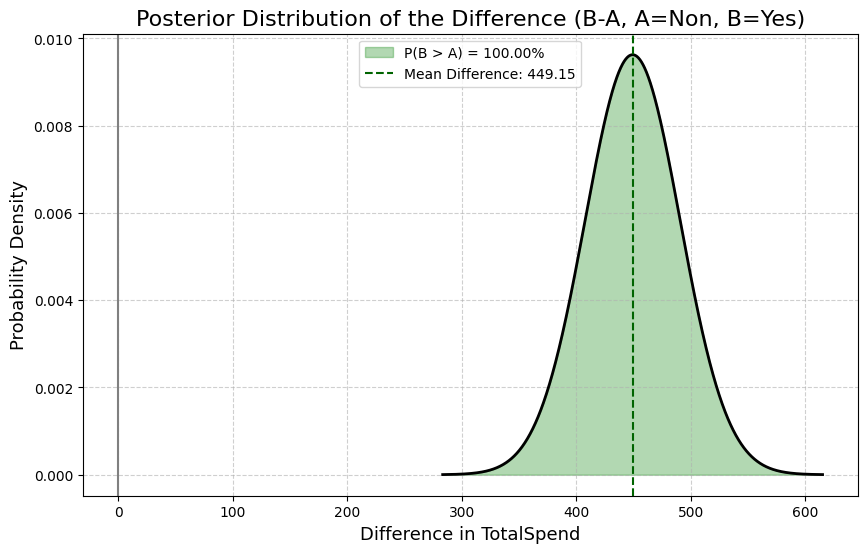

In [26]:
diff_mean = bayes_results['diff_mean']
diff_sd = math.sqrt(bayes_results['diff_var'])
p_b_is_better = bayes_results['p_superior_B_over_A']

x = np.linspace(diff_mean - 4 * diff_sd, diff_mean + 4 * diff_sd, 1000)
pdf = norm.pdf(x, diff_mean, diff_sd)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, pdf, color='black', linewidth=2)
ax.fill_between(x, pdf, where=(x > 0), color='green', alpha=0.3, label=f'P(B > A) = {p_b_is_better:.2%}')
ax.fill_between(x, pdf, where=(x <= 0), color='red', alpha=0.3)

ax.axvline(x=diff_mean, color='darkgreen', linestyle='--', label=f'Mean Difference: {diff_mean:.2f}')
ax.axvline(x=0, color='grey', linestyle='-')

ax.set_title('Posterior Distribution of the Difference (B-A, A=Non, B=Yes)', fontsize=16)
ax.set_xlabel('Difference in TotalSpend', fontsize=13)
ax.set_ylabel('Probability Density', fontsize=13)
ax.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig(FIG_PATH + '/posterior_distribution_B_over_A.png', dpi=200, bbox_inches='tight')
plt.show()

<h2>5. Propensity Score Matching + Average Treatment Effect on the Treated</h2>

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from typing import Tuple

In [28]:
def _standardized_mean_diff(X_t: np.ndarray, X_c: np.ndarray) -> np.ndarray:
    """
    SMD = (mean_t - mean_c) / pooled_std
    """
    mt, mc = X_t.mean(axis=0), X_c.mean(axis=0)
    vt, vc = X_t.var(axis=0, ddof=1), X_c.var(axis=0, ddof=1)
    pooled = np.sqrt((vt + vc) / 2.0 + 1e-12)
    return (mt - mc) / pooled

In [41]:
def psm_att(df: pd.DataFrame, treatment: str, outcome: str, covariates: List[str],
            caliper: Optional[float] = None, random_state: int = 42, 
            out_dir: Optional[str] = None) -> Dict[str, float]:
    """
    dict : {'att','n_pairs','smd_before_mean','smd_after_mean', 'pairs': list}
    """

    X_df = df[covariates].copy()
    
    X = X_df.to_numpy()
    y = df[outcome].to_numpy()
    T = df[treatment].astype(int).to_numpy()

    # Propensity score estimates
    lr = LogisticRegression(max_iter=3000, class_weight=None, n_jobs=None)
    lr.fit(X, T)

    # ps: If this user has features of X, what is the probability that the user responds "yes"
    # P(T=1|X)
    ps = lr.predict_proba(X)[:, 1]

    # Divide 'Treatment' from 'Control' -> distance based on PS
    idx_t = np.where(T == 1)[0]    # Response=1
    idx_c = np.where(T == 0)[0]    # Response=0
    ps_t, ps_c = ps[idx_t], ps[idx_c]

    nn = NearestNeighbors(n_neighbors=1, algorithm="auto").fit(ps_c.reshape(-1, 1))
    dist, idx = nn.kneighbors(ps_t.reshape(-1, 1), return_distance=True)
    idx = idx.ravel()
    dist = dist.ravel()

    pairs: List[Tuple[int, int]] = []
    for i_t, d, i_c_local in zip(idx_t, dist, idx):
        i_c = idx_c[i_c_local]
        # caliper: if too far
        if caliper is not None and d > caliper:
            continue
        pairs.append((int(i_c), int(i_t)))

    # ATT
    diffs = [y[i_t] - y[i_c] for i_c, i_t in pairs]
    att = float(np.mean(diffs)) if len(diffs) > 0 else float("nan")

    # SMD -> Compare before/after matching
    # if X is a sparse matrix, transform into dense matrix
    def _to_dense(Z):
        return Z.toarray() if hasattr(Z, "toarray") else Z
    X_dense = _to_dense(X)
    
    smd_before = _standardized_mean_diff(X_dense[idx_t], X_dense[idx_c])
    smd_before_mean = float(np.mean(np.abs(smd_before)))
    
    smd_before_detail = {cov: float(smd) for cov, smd in zip(covariates, np.abs(smd_before))}
    
    ps_after = {}
    smd_after_detail = {}
    
    if pairs:
        t_sel = np.array([i_t for _, i_t in pairs])
        c_sel = np.array([i_c for i_c, _ in pairs])
        smd_after = _standardized_mean_diff(X_dense[t_sel], X_dense[c_sel])
        smd_after_mean = float(np.mean(np.abs(smd_after)))

        smd_after_detail = {cov: float(smd) for cov, smd in zip(covariates, np.abs(smd_after))}
        ps_after = {
            "treatment": ps[t_sel].tolist(),
            "control": ps[c_sel].tolist()
        }
    else:
        smd_after_mean = float("nan")

    ps_before = {
        "treatment": ps[idx_t].tolist(),
        "control": ps[idx_c].tolist()
    }

    res = {
        "att": att, "n_pairs": int(len(pairs)),
        "smd_before_mean": smd_before_mean,
        "smd_after_mean": smd_after_mean,
        "pairs": pairs[:10],
        "smd_before_detail": smd_before_detail,
        "smd_after_detail": smd_after_detail,
        "ps_before": ps_before,
        "ps_after": ps_after,
    }


    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        with open(f"{out_dir}/psm_att_report.json", "w", encoding="utf-8") as f:
            json.dump(res, f, ensure_ascii=False, indent=2)

    return res


In [42]:
cov_pool

['Age',
 'Income',
 'Kidhome',
 'Teenhome',
 'Education',
 'Marital_Status',
 'Recency',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'NumDealsPurchases',
 'AcceptedCnt']

In [43]:
covariates=['Age', 
            'Income', 
            'Kidhome', 
            'Teenhome', 
            'Recency', 
            'NumWebPurchases',
            'NumCatalogPurchases',
            'NumStorePurchases',
            'NumWebVisitsMonth',
            'NumDealsPurchases',
            'AcceptedCnt'
           ]
psm_results = psm_att(df=df, treatment='Response', outcome='TotalSpend', covariates=covariates, out_dir='outdata')

In [34]:
#print(psm_att)

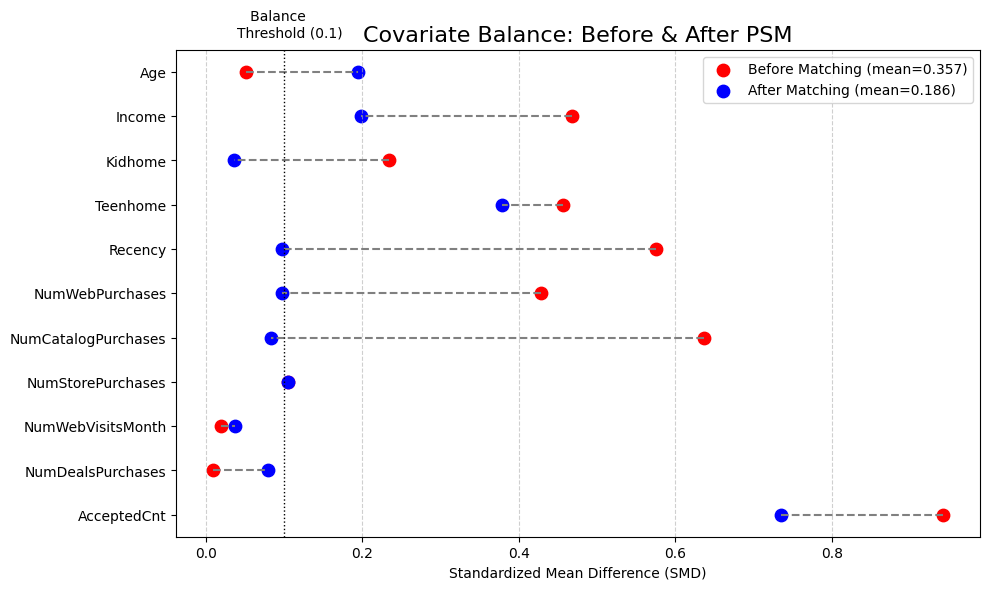

In [63]:
smd_before = psm_results['smd_before_detail']
smd_after = psm_results['smd_after_detail']
covariates = list(smd_before.keys())
y_pos = np.arange(len(covariates))

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(smd_before.values(), y_pos, color='red', label=f"Before Matching (mean={psm_results['smd_before_mean']:.3f})", s=80)
ax.scatter(smd_after.values(), y_pos, color='blue', label=f"After Matching (mean={psm_results['smd_after_mean']:.3f})", s=80)

for i in range(len(covariates)):
    ax.plot([list(smd_before.values())[i], list(smd_after.values())[i]], [y_pos[i], y_pos[i]], color='grey', linestyle='--')

ax.axvline(x=0.1, color='black', linestyle=':', linewidth=1)
ax.text(0.04, -0.8, '   Balance\nThreshold (0.1)', color='black', fontsize=10)

ax.set_yticks(y_pos)
ax.set_yticklabels(covariates)
ax.invert_yaxis()
ax.set_xlabel('Standardized Mean Difference (SMD)')
ax.set_title('Covariate Balance: Before & After PSM', fontsize=16)
ax.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(FIG_PATH + '/covariate_balance_before_after_PSM.png', dpi=200, bbox_inches='tight')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

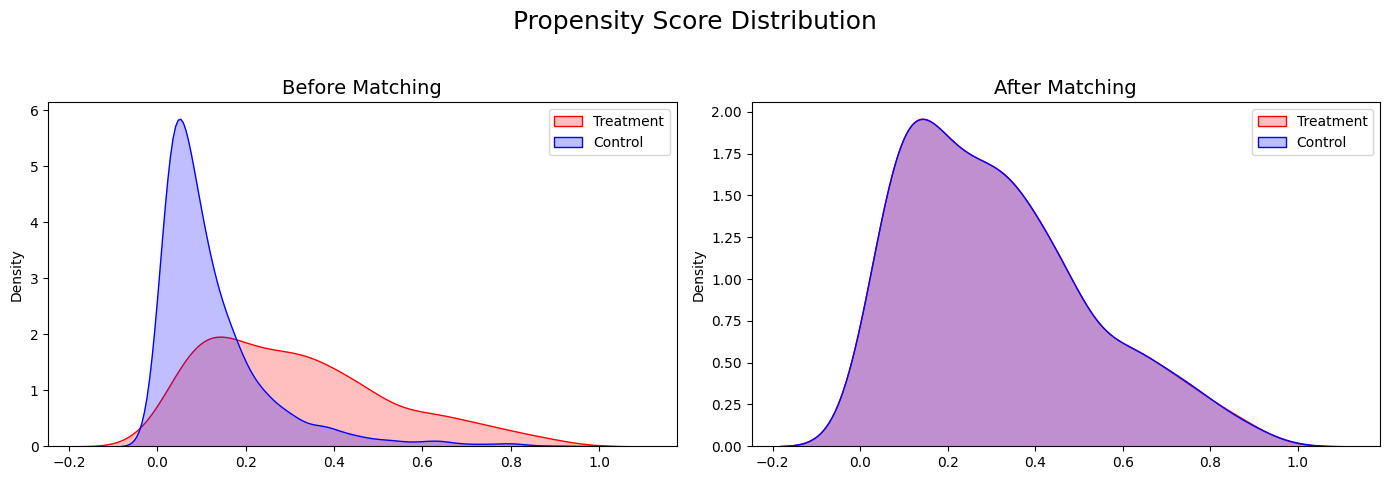

In [46]:
ps_t_before = psm_results['ps_before']['treatment']
ps_c_before = psm_results['ps_before']['control']
ps_t_after = psm_results['ps_after']['treatment']
ps_c_after = psm_results['ps_after']['control']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.kdeplot(ps_t_before, ax=axes[0], color='red', label='Treatment', fill=True)
sns.kdeplot(ps_c_before, ax=axes[0], color='blue', label='Control', fill=True)
axes[0].set_title('Before Matching', fontsize=14)
axes[0].legend()

sns.kdeplot(ps_t_after, ax=axes[1], color='red', label='Treatment', fill=True)
sns.kdeplot(ps_c_after, ax=axes[1], color='blue', label='Control', fill=True)
axes[1].set_title('After Matching', fontsize=14)
axes[1].legend()

fig.suptitle('Propensity Score Distribution', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(FIG_PATH + '/propensity_score_distribution.png', dpi=200, bbox_inches='tight')
plt.show()

In [48]:
# att_value = psm_results['att']

# fig, ax = plt.subplots(figsize=(6, 7))
# bar = ax.bar('ATT', att_value, color='green', alpha=0.7, width=0.5)
# ax.text(bar[0].get_x() + bar[0].get_width()/2, att_value, f'{att_value:.2f}', ha='center', va='bottom', fontsize=14, fontweight='bold')
# ax.set_ylabel('Estimated Effect (Additional Spend)')
# ax.set_title('Average Treatment Effect on the Treated (ATT)', fontsize=16)
# ax.get_xaxis().set_ticks([])
# plt.axhline(y=0, color='black', linewidth=0.8)
# plt.tight_layout()
# plt.show()